# 🧮 Digit Recognizer- Getting started with Tensorflow: 



<div style="color:white;display:fill;border-radius:5px;background-color:#CCCCFF;
       font-size:150%;font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 10px;color:white;"><b> About the Notebook:</b></p>
</div>

In this notebook I am trying to correctly identify digits from a dataset of tens of thousands of handwritten images from a curated set of MNIST ("Modified National Institute of Standards and Technology") data. My goal is to build simple neural networks and understand the fundamentals of computer vision and learn tons of small yet significant details in Deep Learning on the go. 

In [1]:
# import the libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# load and check the shape of train data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.shape

(42000, 785)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# load and check the shape of test data
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.shape

(28000, 784)

In [5]:
# Data preparation
X = train.drop(['label'], axis = 1)
y = train['label']

In [6]:
# scale the images betwee 0 and 1 by dividing the pixels by 255

X = X.astype('float32') / 255
test = test.astype('float32') / 255

In [7]:
# split the train data into train and validation set

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
# make a generic single layer Neural Network

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')])

# compile the model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs= 5)

2022-03-30 01:36:23.793459: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-30 01:36:24.108368: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5654 - accuracy: 0.8576
Epoch 2/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3262 - accuracy: 0.9101
Epoch 3/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2944 - accuracy: 0.9179
Epoch 4/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2785 - accuracy: 0.9212
Epoch 5/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2684 - accuracy: 0.9246


In [9]:
# add hidden layers in the Neural Network
model = keras.Sequential([
    keras.layers.Dense(200, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')])

# compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2986 - accuracy: 0.9152
Epoch 2/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1300 - accuracy: 0.9610
Epoch 3/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0858 - accuracy: 0.9741
Epoch 4/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0631 - accuracy: 0.9811
Epoch 5/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0467 - accuracy: 0.9864


In [10]:
# validate the results

# make predictions on validation data(this will provide scores for each of the ten values from 0-10)
predictions = model.predict(X_validation)

# select the max values from each prediction array
predictions_val = [np.argmax(i) for i in predictions]

#predictions_val


In [11]:
# create the confusion matrix to check the results
confusion_matrix = tf.math.confusion_matrix(labels = y_validation, predictions = predictions_val)

<AxesSubplot:>

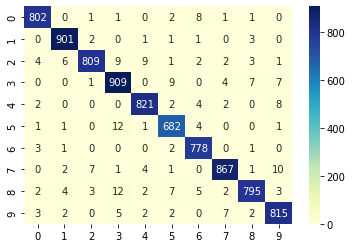

In [12]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap="YlGnBu")

In [13]:
# get the score of the model

score = model.evaluate(X_validation, y_validation)

print("Validation loss:", score[0])
print("Validation accuracy:", score[1])

263/263 [==============================] - 1s 1ms/step - loss: 0.0927 - accuracy: 0.9737
Validation loss: 0.09271068125963211
Validation accuracy: 0.9736904501914978
